# Computer Vision Assignment 1 Part 1
---

Semester: **Fall 2022**

Due date: **September 29th 2022, 11.59PM EST.**

## Introduction
---

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST (handwritten digits)
- CIFAR-10 (32x32 resolution color images of 10 object classes)

## Instructions
---

You should perform this assignment using Google Colab. 
* Before starting, clone this assignment using `File > Save a copy in Drive`. 
* After you're done, go through the notebook and ensure that you have answered all questions.
* Finally, submit the ipynb `File > Download > Download .ipynb` on brightspace


## 1. Warmup [5%]
---

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand. MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. On the other hand, CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

* (a) Display 10 random images from each class of MNIST
* (b) Do the same for each class of CIFAR-10

Use `matplotlib` and ipython notebook's visualization capabilities. See [this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for hints on how to achieve this.

## 2. Training a Single Layer Network on MNIST [10%]
---

* (a) Start by running the training on MNIST and train the model for 20 epochs.
By default, the model will train on MNIST.

This will initialize a single layer model and train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). The loss function ([cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy)) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`. The default values for the learning rate, batch size and number of epochs are given in the `options` cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. Note the decrease in training loss and corresponding decrease in validation errors.

* (b): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

* (c): Reduce the number of training examples to just 50. (Hint: limit the iterator in the `train` function) and train the model until the loss converges. Explain what is happening to the model.

## 3. Training a Multi-Layer Network on MNIST [10%]
---

* (a) Add an extra layer with 1000 hidden units and a `tanh` nonlinearity. (Hint: modify the `Net` class). Train the model for 10 epochs.
* (b) Now set the learning rate to 10 and observe what happens during training. Give a brief explanation of your observations

## 4. Training a Convolutional Network on CIFAR [25%]
---

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- (a) Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

* (b) Train it for 20 epochs on the CIFAR-10 training set. Show an image of the first layer filters.

* (c) Give a breakdown of the parameters within the above model, and the overall number.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may speed up training if you use a GPU runtime (`RunTime > Change Runtime Type > GPU`).

In [4]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms, utils

1. Warmup
* (a) Display 10 random images from each class of MNIST
* (b) Do the same for each class of CIFAR-10


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



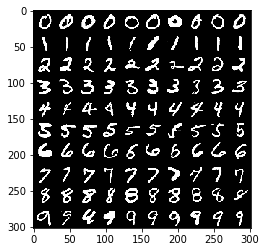

Files already downloaded and verified


ValueError: ignored

In [9]:
import matplotlib.pyplot as plt
import numpy as np

mnist_classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

cifar_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_of_images = 10
all_mnist_images = []
all_cifar_images = []

# mnist_dataloaders = dict.fromkeys(mnist_classes, 0)
# cifar_dataloaders = dict.fromkeys(cifar_classes, 0)

# mnist_images = dict.fromkeys(mnist_classes, 0)
# cifar_images = dict.fromkeys(cifar_classes, 0)

# functions to show an image
def imshow(img):
    # img = img / 2 + 0.5
    img = utils.make_grid(img, nrow = 10)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')
    plt.show()


# print 10 images from each class of MNIST
mnist_data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
# mnist_trainset = datasets.MNIST(root='.', train=True, download=True, transform=mnist_data_transform)
# mnist_testset = datasets.MNIST(root='.', train=False, download=True, transform=mnist_data_transform)

for i in range(10):
  dataset_local = datasets.MNIST(root='.', train=True, download=True, transform=mnist_data_transform)
  idx = dataset_local.targets == i
  dataset_local.targets = dataset_local.targets[idx]
  dataset_local.data = dataset_local.data[idx]
  train_loader_local = torch.utils.data.DataLoader(dataset_local, batch_size=num_of_images, shuffle=True, num_workers=0)

  # get some random training images
  dataiter = iter(train_loader_local)
  images, labels = dataiter.next()
  for image in images:
    all_mnist_images.append(image)
  # # show images
  # imshow(torchvision.utils.make_grid(images))



# for i in range(10):
#   for image in mnist_images[i]:
#     all_images.append(image)

# imshow(torchvision.utils.make_grid(all_mnist_images))
imshow(all_mnist_images)


# train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True, num_workers=0)
# test_loader  = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=False, num_workers=0)


cifar_data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])


for i in range(10):
  dataset_local2 = datasets.CIFAR10(root='.', train=True, download=True, transform=cifar_data_transform)
  idx = dataset_local2.targets == i
  dataset_local2.targets = dataset_local2.targets[idx]
  dataset_local2.data = dataset_local2.data[idx]
  
  train_loader_local2 = torch.utils.data.DataLoader(dataset_local2, batch_size=num_of_images, shuffle=True, num_workers=0)

  # get some random training images
  dataiter2 = iter(train_loader_local2)
  images2, labels2 = dataiter2.next()
  for image in images2:
    all_cifar_images.append(image)

print(len(all_cifar_images))
# imshow(torchvision.utils.make_grid(all_cifar_images))
imshow(all_cifar_images)




In [10]:
dataset_parent = datasets.CIFAR10(root='.', train=True, download=True, transform=cifar_data_transform)
for i in range(10):
  dataset_local2 = dataset_parent
  print(len(dataset_local2))
  idx = dataset_local2.targets == i
  dataset_local2.targets = dataset_local2.targets[idx]
  dataset_local2.data = dataset_local2.data[idx]
  
  train_loader_local2 = torch.utils.data.DataLoader(dataset_local2, batch_size=num_of_images, shuffle=True, num_workers=0)

  # get some random training images
  dataiter2 = iter(train_loader_local2)
  images2, labels2 = dataiter2.next()
  for image in images2:
    all_cifar_images.append(image)

print(len(all_cifar_images))
# imshow(torchvision.utils.make_grid(all_cifar_images))
imshow(all_cifar_images)


Files already downloaded and verified
50000


ValueError: ignored

2. Training a Single Layer Network on MNIST [10%]

In [11]:
# Options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01         # learning rate

In [12]:
# Data Loading
# This cell might take some time when you run it for the first time, 
# because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

In [14]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print ("device ",device)
network = network.to(device)

device  cpu


In [17]:
def train(epoch, network=network, optimizer=optimizer):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(network=network):
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data = data.to(device)
        target = target.to(device)
        output = network(data)
        output = output.to(device)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [22]:
train(1)

RuntimeError: ignored

In [11]:
test()


Test set: Average loss: 0.3335, Accuracy: 9076/10000 (91%)



2 a

In [12]:
epochs_2a = 20

for i in range(epochs_2a):
  train(i)

test()

Train Epoch: 0 [0/60000 (0%)]	Loss: 0.519265
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.279132
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.293566
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.203732
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.499042
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.316608
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.364140
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.461611
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.162984
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.439840
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.209425
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.384226
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.489549
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.300777
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.253731
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.184625
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.202205
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.289930
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.217839
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.803297
Train Epoch:

2 b Plot Images

In [13]:
print(network.linear.weight)

Parameter containing:
tensor([[-0.0084,  0.0256, -0.0198,  ...,  0.0210,  0.0187,  0.0153],
        [ 0.0438,  0.0337,  0.0404,  ...,  0.0499,  0.0351, -0.0141],
        [-0.0082, -0.0062, -0.0044,  ..., -0.0165,  0.0057, -0.0486],
        ...,
        [-0.0259, -0.0303,  0.0119,  ..., -0.0083,  0.0027,  0.0110],
        [ 0.0318,  0.0047, -0.0082,  ...,  0.0120, -0.0118,  0.0360],
        [-0.0137,  0.0330,  0.0398,  ...,  0.0070,  0.0081,  0.0239]],
       device='cuda:0', requires_grad=True)


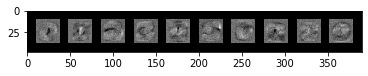

In [14]:
def PlotWeights(weights):
    weights = weights.to("cpu")
    # img = torch.reshape(weights, (28,28))
    # img = torch.reshape(weights, (10,1,28,28)).detach().numpy()
    img = torch.reshape(weights, (10,1,28,28))
    img = utils.make_grid(img, nrow = 10, padding = 10, normalize = True)
    # img = img.to("cpu")
    # npimg = img.detach().numpy()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    plt.show()


PlotWeights(network.linear.weight)

2c Training examples = 50

In [21]:
batch_size_2c = 50
epochs_2c = 25

# Data Loading
# This cell might take some time when you run it for the first time, 
# because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_2c, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size_2c, shuffle=False, num_workers=0)

def train_2c(epoch):
    network.train()
    epoch_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        logs_loss = []
        # if epoch % 100 == 0 and batch_idx % 100 == 0:
        #     print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        #         epoch, batch_idx * len(data), len(train_loader.dataset),
        #         100. * batch_idx / len(train_loader), loss.item()))
    return epoch_loss

epoch_losses = []

for i in range(epochs_2c):
  epoch_losses.append(train_2c(i))

plt.plot(epoch_losses)

test()

RuntimeError: ignored

2c) Explanation for the observed behaviour:
Overfitting of the model because the number of large number of epochs and very less number of examples.

3b) Tthe step size is big because of high value of learning rate and the model will not converge.

In [15]:
class Net3a(nn.Module):
      def __init__(self, num_inputs, num_outputs):
        super(Net3a, self).__init__()
        self.linear = nn.Linear(num_inputs, 1000)
        self.hidden = nn.Linear(1000, num_outputs)
        self.nonlinearity = nn.Tanh()


      def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        inp1 = self.linear(input)
        inp1 = self.hidden(inp1)
        output = self.nonlinearity(inp1)
        return output

network_3a = Net3a(num_inputs, num_outputs)
network_3a.to(device)


for i in range(epochs):
  train(i, network=network_3a)

test()

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.312447
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.297339
Train Epoch: 0 [12800/60000 (21%)]	Loss: 2.274647
Train Epoch: 0 [19200/60000 (32%)]	Loss: 2.339252
Train Epoch: 0 [25600/60000 (43%)]	Loss: 2.257341
Train Epoch: 0 [32000/60000 (53%)]	Loss: 2.318007
Train Epoch: 0 [38400/60000 (64%)]	Loss: 2.365285
Train Epoch: 0 [44800/60000 (75%)]	Loss: 2.314075
Train Epoch: 0 [51200/60000 (85%)]	Loss: 2.322471
Train Epoch: 0 [57600/60000 (96%)]	Loss: 2.336507
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.282738
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.284427
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.291853
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.321346
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.367970
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.343386
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.343748
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.221369
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.229952
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.385115
Train Epoch:

In [24]:
optimizer_3a = optim.SGD(network.parameters(), lr=10)

for i in range(epochs):
  train(i, network=network_3a, optimizer=optimizer_3a)

test()

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.364279
Train Epoch: 0 [5000/60000 (8%)]	Loss: 2.314555
Train Epoch: 0 [10000/60000 (17%)]	Loss: 2.328640
Train Epoch: 0 [15000/60000 (25%)]	Loss: 2.370175
Train Epoch: 0 [20000/60000 (33%)]	Loss: 2.356219
Train Epoch: 0 [25000/60000 (42%)]	Loss: 2.355130
Train Epoch: 0 [30000/60000 (50%)]	Loss: 2.296751
Train Epoch: 0 [35000/60000 (58%)]	Loss: 2.251996
Train Epoch: 0 [40000/60000 (67%)]	Loss: 2.236342
Train Epoch: 0 [45000/60000 (75%)]	Loss: 2.418256
Train Epoch: 0 [50000/60000 (83%)]	Loss: 2.325689
Train Epoch: 0 [55000/60000 (92%)]	Loss: 2.282537
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.325911
Train Epoch: 1 [5000/60000 (8%)]	Loss: 2.219306
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.308949
Train Epoch: 1 [15000/60000 (25%)]	Loss: 2.300860
Train Epoch: 1 [20000/60000 (33%)]	Loss: 2.253742
Train Epoch: 1 [25000/60000 (42%)]	Loss: 2.339398
Train Epoch: 1 [30000/60000 (50%)]	Loss: 2.287726
Train Epoch: 1 [35000/60000 (58%)]	Loss: 2.270855
Train Epoch: 1

In [20]:
dataset_4 = 'cifar10' # options: 'mnist' | 'cifar10'
batch_size_4 = 64   # input batch size for training
epochs_4 = 2       # number of epochs to train
lr_4 = 0.01  

data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_4, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size_4, shuffle=False, num_workers=0)

num_inputs = 3072
num_outputs = 10

class Net4(nn.Module):
      def __init__(self, num_inputs, num_outputs):
        super(Net4, self).__init__()
        #Layer 1
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool1 = nn.MaxPool2d(2)

        #Layer 2
        self.conv2 = nn.Conv2d(16, 128, 5)
        self.pool2 = nn.MaxPool2d(2)

        #Linear Layer
        self.linear1 = nn.Linear(3200, 64)

        #Output Layer
        self.out = nn.Linear(64, 10)

      def forward(self, input):
        x = F.tanh(self.conv1(input))
        x = self.pool1(x)
        x = F.tanh(self.conv2(x))
        x = self.pool2(x)

        x = x.view(-1, 3200)

        x = F.tanh(self.linear1(x))

        x = self.out(x)
        return x

network_4 = Net4(num_inputs, num_outputs)
network_4.to(device)
optimizer_4 = optim.SGD(network.parameters(), lr=lr_4)


for i in range(epochs_4):
  train(i, network=network_4, optimizer=optimizer_4)

test()

total_params = 0
for name, parameter in network.named_parameters():
          if not parameter.requires_grad: continue
          params = parameter.numel()
          print(name, params)
          total_params+=params
print('Total parameters are: ', total_params)        

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 0 [0/50000 (0%)]	Loss: 2.331619
Train Epoch: 0 [6400/50000 (13%)]	Loss: 2.309154
Train Epoch: 0 [12800/50000 (26%)]	Loss: 2.306031
Train Epoch: 0 [19200/50000 (38%)]	Loss: 2.325097
Train Epoch: 0 [25600/50000 (51%)]	Loss: 2.296280
Train Epoch: 0 [32000/50000 (64%)]	Loss: 2.311845
Train Epoch: 0 [38400/50000 (77%)]	Loss: 2.307809
Train Epoch: 0 [44800/50000 (90%)]	Loss: 2.324075
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.312090
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.309128
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.327743
Train Epoch: 1 [19200/50000 (38%)]	Loss: 2.303789
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.302726
Train Epoch: 1 [32000/50000 (64%)]	Loss: 2.294676
Train Epoch: 1 [38400/50000 (77%)]	Loss: 2.314143
Train Epoch: 1 [44800/50000 (90%)]	Loss: 2.283069


RuntimeError: ignored